       decade  deaths  country
0        1520     1.0  Estonia
1        1530     1.0  Estonia
2        1540     5.0  Estonia
3        1580     5.0  Estonia
4        1590     0.0  Estonia
...       ...     ...      ...
10935    1740     0.0  Germany
10936    1750     0.0  Germany
10937    1760     0.0  Germany
10938    1770     0.0  Germany
10939    1790     0.0  Germany

[10940 rows x 3 columns]


/tmp/ipykernel_18331/448325614.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_sums = df.groupby("decade").sum()


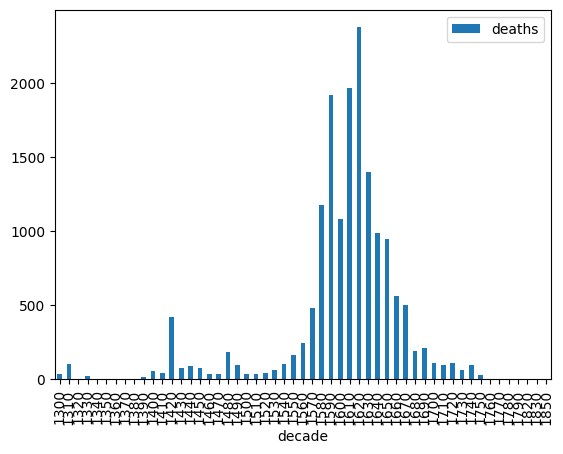

In [7]:
# from python std library
import csv
import pandas as pd
# python3 -m pip install np
import numpy as np
# python3 -m pip install matplotlib
import matplotlib.pyplot as plt

columns = ["decade", "deaths", "country"]
df = pd.read_csv("/home/student/mycode/graphing/trials.csv", delimiter=',', usecols=columns)
print(df)

category_sums = df.groupby("decade").sum()

ax = category_sums.plot.bar(y="deaths")





plt.show()